In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
from numba import jit
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import eigvals

In [ ]:
#select fonts and plotstyles
plt.rcParams['font.family'] = 'Liberation Serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

fname = 'drive/MyDrive/Caos/'

Mounted at /content/drive


# Set of equations

Lorenz system of equations:

$$\dot{x} = \sigma(y-x)$$
$$\dot{y} = x(\rho - z) -y$$
$$\dot{z} = xy - \beta z$$

Lorenz set $\sigma = 10$ and $\beta = 8/3$

# 4th order Runge Kutta algorithm

In [ ]:
@jit
def lorenz(x, y, z, sigma, rho, beta):
  '''
  Function to set the Lorenz system of equations
  that will later be used in the Runge-Kutta method
  '''
    x_ponto = sigma * (y - x)
    y_ponto = x*(rho - z) - y
    z_ponto = x*y - beta*z
    return x_ponto, y_ponto, z_ponto

@jit(nopython=True, parallel=True)
def rk4_lorenz(x0, y0, z0, sigma, rho, beta, tf, dt):
  '''
  Runge-Kutta method of integration, with the folowing parameters:
  
  =================
  Input:
  =================
  x0    -> (float) the initial value in the x direction
  y0    -> (float) the initial value in the y direction
  z0    -> (float) the initial value in the z direction
  sigma -> (float) parameter of Lorenz system
  rho   -> (float) parameter of Lorenz system
  beta  -> (float) paremeter of Lorenz system
  tf    -> (float) final time of simulation
  dt    -> (float) time step of simulation

  =================
  Output:
  =================
  x     -> (numpy.array) position vector in x direction
  y     -> (numpy.array) position vector in y direction
  z     -> (numpy.array) position vector in z direction
  t     -> (numpy.array) time vector
  '''

  t = np.arange(0, tf+dt, dt)
  tsize = len(t)
  x, y, z = np.zeros((3, tsize))

  x[0], y[0], z[0] = x0, y0, z0

  for i in range(tsize-1):
    k1, l1, m1 = lorenz( x[i], y[i], z[i], sigma, rho, beta)

    k2, l2, m2 = lorenz( x[i] + 0.5*k1*dt, y[i] + 0.5*l1*dt, z[i] + 0.5*m1*dt, sigma, rho, beta)

    k3, l3, m3 = lorenz( x[i] + 0.5*k2*dt, y[i] + 0.5*l2*dt, z[i] + 0.5*m2*dt, sigma, rho, beta)

    k4, l4, m4 = lorenz( x[i] + k3*dt, y[i] + l3*dt, z[i] + m3*dt, sigma, rho, beta)

    x[i+1] = x[i] + dt*(1/6)*(k1 + 2*k2 + 2*k3 + k4)
    y[i+1] = y[i] + dt*(1/6)*(l1 + 2*l2 + 2*l3 + l4)
    z[i+1] = z[i] + dt*(1/6)*(m1 + 2*m2 + 2*m3 + m4)

  return x, y, z, t

# Basic plots and sanity checks

## $\rho = 0.5$

In [ ]:
sigma = 10
beta = 8/3
rho = 0.5

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

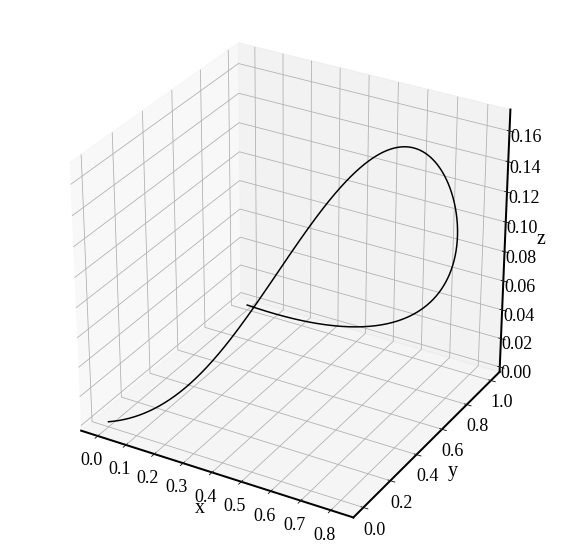

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=05.png', dpi=300, bbox_inches='tight')

pylab.show()

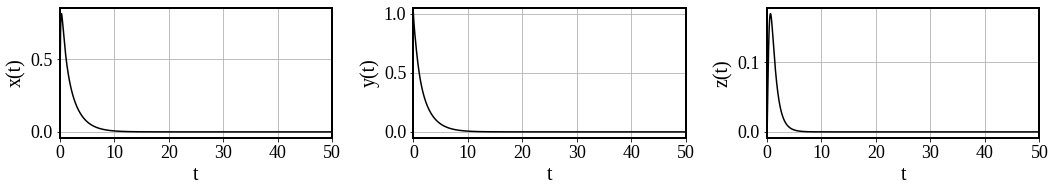

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=05.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho=10$

In [ ]:
sigma = 10
beta = 8/3
rho = 10

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

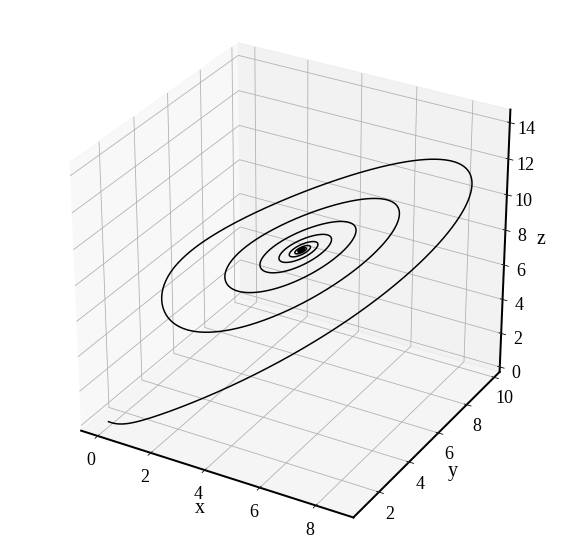

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=10.png', dpi=300, bbox_inches='tight')

pylab.show()

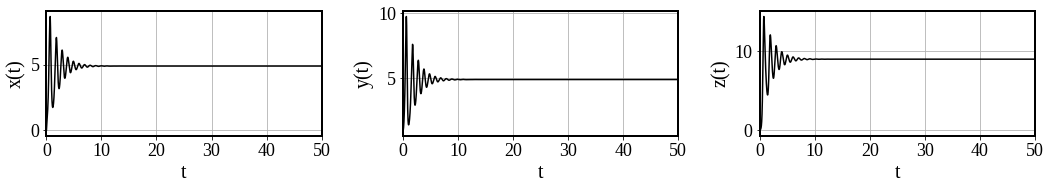

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=10.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho = 13.926$

In [ ]:
sigma = 10
beta = 8/3
rho = 13.926

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

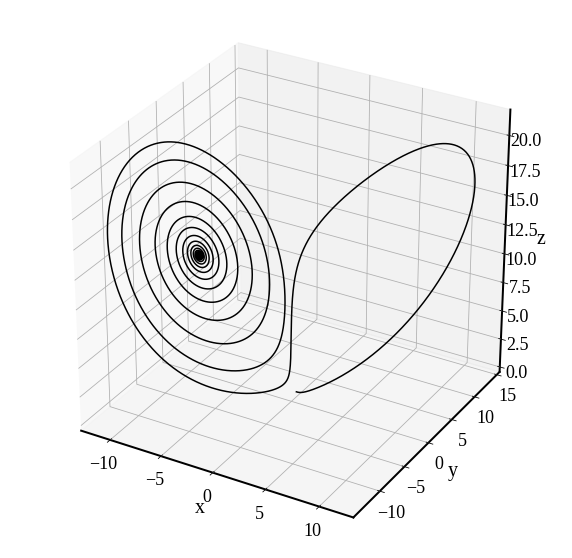

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=13.png', dpi=300, bbox_inches='tight')

pylab.show()

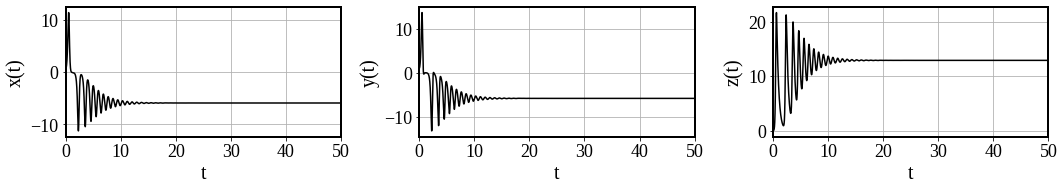

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=13.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho=15$

In [ ]:
sigma = 10
beta = 8/3
rho = 15

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

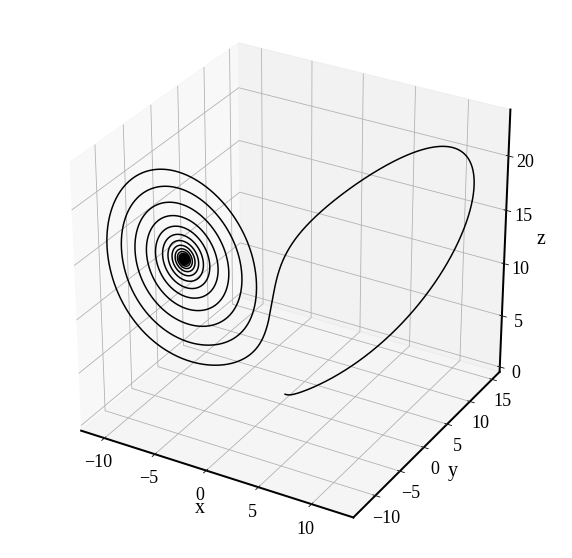

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=15.png', dpi=300, bbox_inches='tight')

pylab.show()

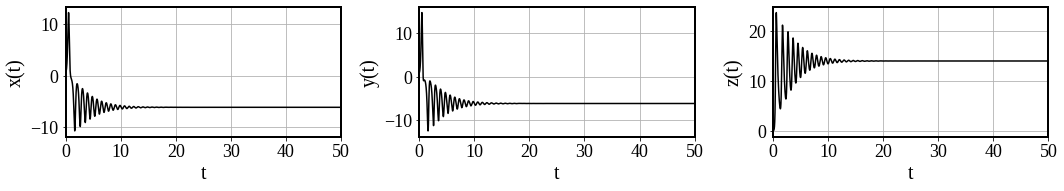

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=15.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho = 24$

In [ ]:
sigma = 10
beta = 8/3
rho = 24

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

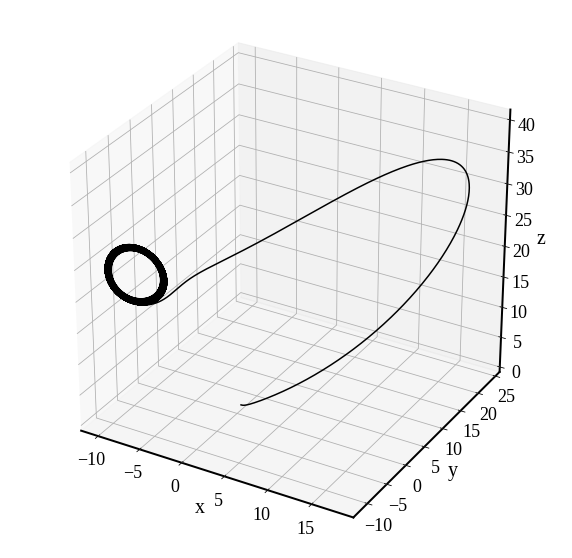

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=24.png', dpi=300, bbox_inches='tight')

pylab.show()

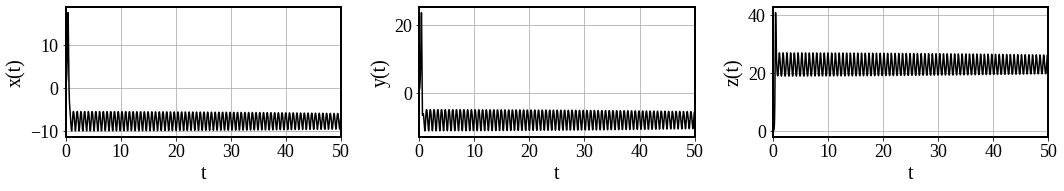

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=24.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho=28$

In [ ]:
sigma = 10
beta = 8/3
rho = 28

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=50, dt=0.001)

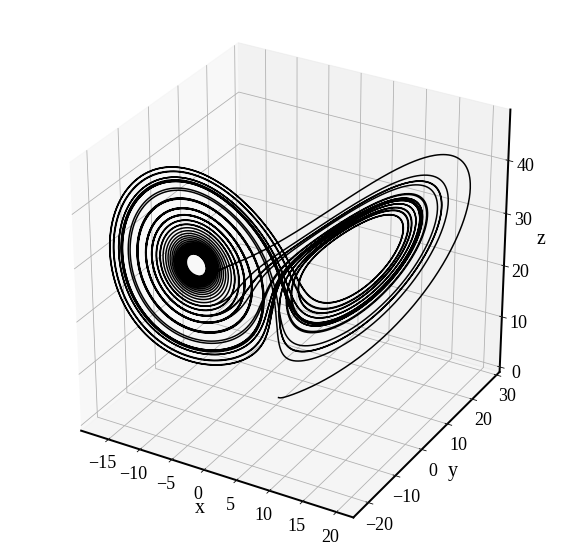

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0], rk4[1], rk4[2], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=28.png', dpi=300, bbox_inches='tight')

pylab.show()

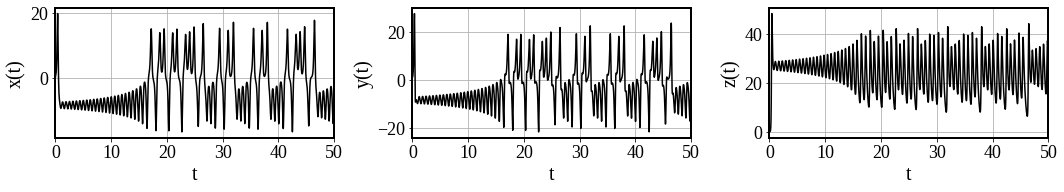

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1], rk4[i], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,50)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=28.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho = 80$

In [ ]:
sigma = 10
beta = 8/3
rho = 80

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=100, dt=0.001)

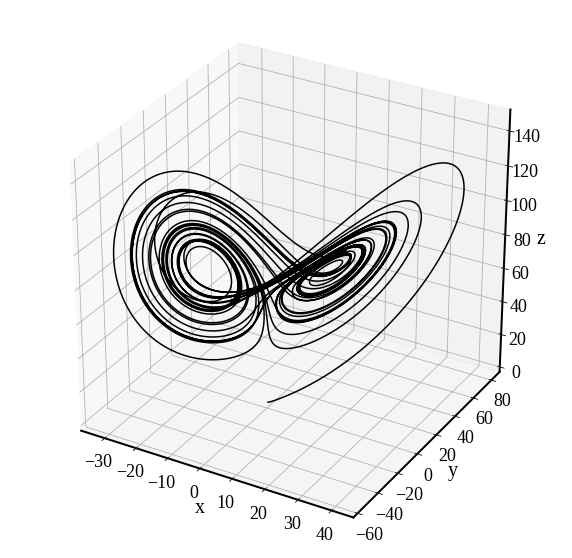

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0][:20000], rk4[1][:20000], rk4[2][:20000], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=80.png', dpi=300, bbox_inches='tight')

pylab.show()

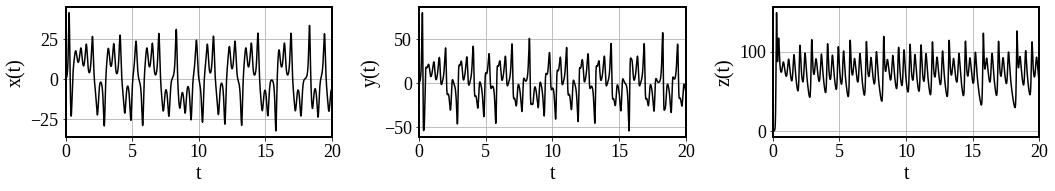

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1][:20000], rk4[i][:20000], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,20)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=80.png', dpi=300, bbox_inches='tight')

plt.show()

## $\rho =350$

In [ ]:
sigma = 10
beta = 8/3
rho = 350

rk4 = rk4_lorenz(x0=0, y0=1, z0=0, sigma=sigma, rho=rho, beta=beta, tf=100, dt=0.001)

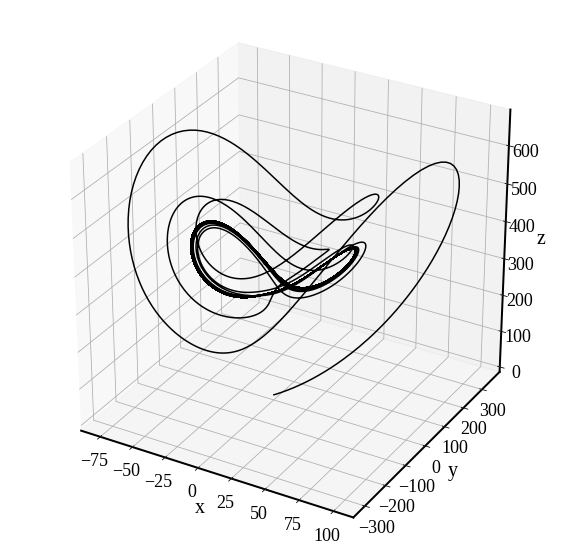

In [ ]:
fig = pylab.figure(figsize=(10,10))
ax = pylab.axes(projection="3d")
ax.plot3D(rk4[0][:20000], rk4[1][:20000], rk4[2][:20000], color='black')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)

#plt.savefig(fname + '3d_rho=350.png', dpi=300, bbox_inches='tight')

pylab.show()

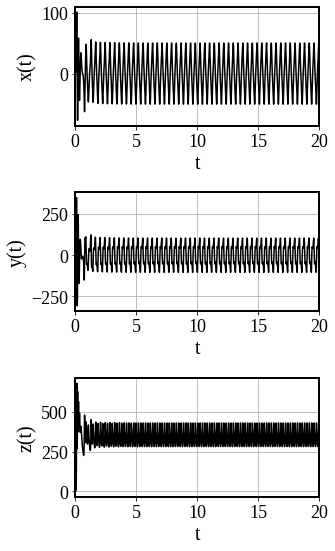

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(5,8))
y_labels = ['x(t)', 'y(t)', 'z(t)']
for i in range(3):
  ax[i].plot(rk4[-1][:20000], rk4[i][:20000], color='black')
  ax[i].set_ylabel(y_labels[i], fontsize=20)
  ax[i].set_xlabel('t', fontsize=20)
  ax[i].set_xlim(0,20)
  ax[i].grid()

plt.tight_layout()

#plt.savefig(fname + 't_rho=350.png', dpi=300, bbox_inches='tight')

plt.show()

# Symmetry in the $x$ and $y$ axis

In [ ]:
rk = rk4_lorenz(x0=1, y0=1, z0=1, sigma=10, rho=28, beta=8/3, tf=100, dt=0.001)

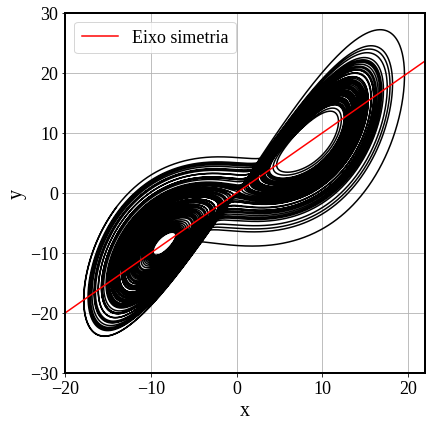

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])

ax.plot(rk[0], rk[1], color='black')
ax.plot(np.linspace(-40,40,1000), np.linspace(-40,40,1000), color='red', label='Eixo simetria')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_xlim(-20,22)
ax.set_ylim(-30,30)
ax.grid()
ax.legend()

#plt.savefig(fname + 'eixo_simetria.png', dpi=300, bbox_inches='tight')

plt.show()

# Determining Lyapunov exponent 

## Setting two systems with nearly equal initial conditions

In [ ]:
sigma = 10
beta = 8/3
rho = 28

r01 = [0,1,0]
r02 = [0,1 + 1e-15,0]

rk4_1 = rk4_lorenz(x0=r01[0], y0=r01[1], z0=r01[2], sigma=sigma, rho=rho, beta=beta, tf=100, dt=0.0001)
rk4_2 = rk4_lorenz(x0=r02[0], y0=r02[1], z0=r02[2], sigma=sigma, rho=rho, beta=beta, tf=100, dt=0.0001)

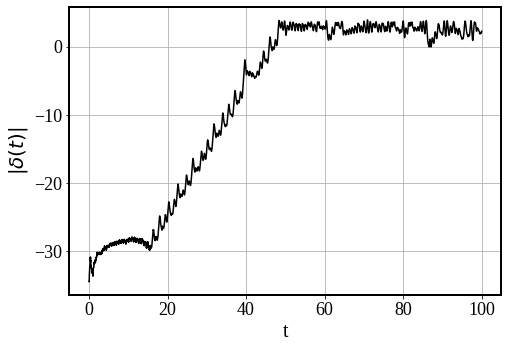

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

ax.plot(rk4_1[-1], np.log(np.sqrt((rk4_1[0] - rk4_2[0])**2 + (rk4_1[1] - rk4_2[1])**2 + (rk4_1[2] - rk4_2[2])**2)), color='black')
ax.set_xlabel('t', fontsize=20)
ax.set_ylabel(r'$|\delta (t)|$', fontsize=20)
ax.grid()

#plt.savefig(fname + 'delta_serie.png', dpi=300, bbox_inches='tight')

plt.show()

Now we try to fit an exponential to the curve

In [ ]:
def func(t, Lambda, b):
  return Lambda*t + b

ti = np.where(rk4_1[-1]==10)[0][0]
tf = np.where(rk4_1[-1]==50)[0][0]
x = rk4_1[-1][ti:tf]
y = np.log(np.sqrt((rk4_1[0][ti:tf] - rk4_2[0][ti:tf])**2 + (rk4_1[1][ti:tf] - rk4_2[1][ti:tf])**2 + (rk4_1[2][ti:tf] - rk4_2[2][ti:tf])**2))

popt, pcov = curve_fit(func, xdata=x, ydata=y)
print(popt)

[  0.88877454 -41.49136752]


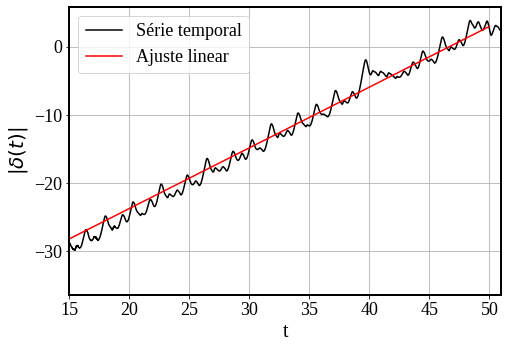

In [ ]:
t = np.linspace(15, 50, 220000)

fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0,0,1,1])

ax.plot(rk4_1[-1], np.log(np.sqrt((rk4_1[0] - rk4_2[0])**2 + (rk4_1[1] - rk4_2[1])**2 + (rk4_1[2] - rk4_2[2])**2)), color='black', label='Série temporal')
ax.plot(t, func(t, popt[0], popt[1]), color='red', label='Ajuste linear')
ax.set_xlabel('t', fontsize=20)
ax.set_ylabel(r'$|\delta (t)|$', fontsize=20)
ax.set_xlim(15,51)
ax.grid()
ax.legend()

#plt.savefig(fname + 'ajuste_delta.png', dpi=300, bbox_inches='tight')

plt.show()

# Bifurcation diagrams

## for $z$ coordenate

In [ ]:
sigma = 10
beta = 8/3
dr = 0.05                    # parameter step size
rho = np.arange(0, 200, dr)  # parameter range
x0, y0, z0 = 1, 1, 1         # initial values


# Save the plot points coordinates and plot the with a single call to plt.plot
# instead of plotting them one at a time, as it's much more efficient
r_maxes = []
z_maxes = []
r_mins = []
z_mins = []

for R in rho:
    xs, ys, zs, t = rk4_lorenz(x0, y0, z0, sigma=sigma, rho=R, beta=beta, tf=50, dt=0.001)
  
    for i in range(1, len(zs) - 1):
        # save the local maxima
        if zs[i - 1] < zs[i] and zs[i] > zs[i + 1]:
            r_maxes.append(R)
            z_maxes.append(zs[i])
        # save the local minima
        elif zs[i - 1] > zs[i] and zs[i] < zs[i + 1]:
            r_mins.append(R)
            z_mins.append(zs[i])

    # "use final values from one run as initial conditions for the next to stay near the attractor"
    xs[0], ys[0], zs[0] = xs[i], ys[i], zs[i]

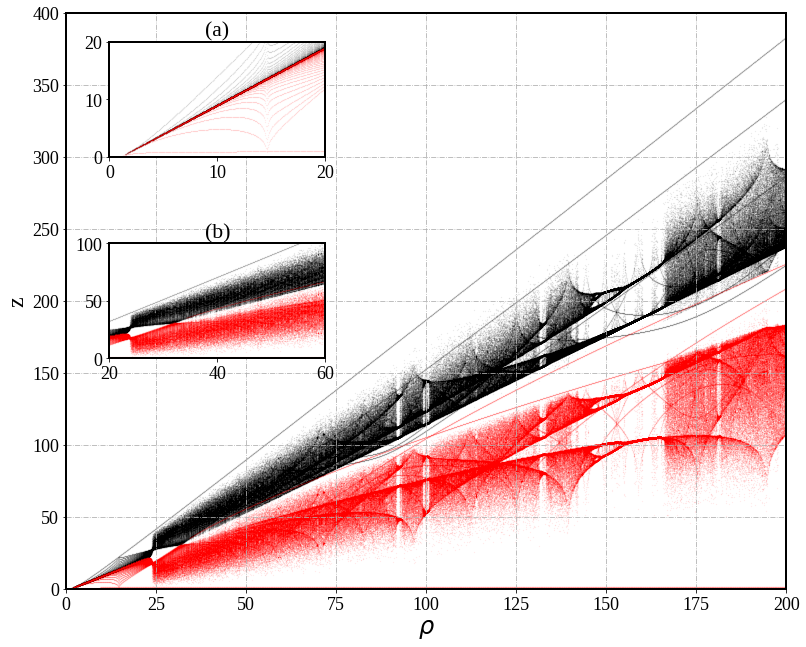

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.06,0.75,0.3,0.2])
ax3 = fig.add_axes([0.06,0.40,0.3,0.2])

ax1.scatter(r_maxes, z_maxes, color="black", s=0.1, alpha=.1)
ax1.scatter(r_mins, z_mins, color="red", s=0.1, alpha=.1)

ax1.grid(linestyle='-.')

ax1.set_xlabel(r'$\rho$', size=24)
ax1.set_ylabel('z', size=24)
ax1.set_xlim(0,200)
ax1.set_ylim(0,400)

ax2.scatter(r_maxes, z_maxes, color="black", s=0.1, alpha=.1)
ax2.scatter(r_mins, z_mins, color="red", s=0.1, alpha=.1)
ax2.set_xlim(0,20)
ax2.set_ylim(0,20)
ax2.set_title('(a)')

ax3.scatter(r_maxes, z_maxes, color="black", s=0.1, alpha=.1)
ax3.scatter(r_mins, z_mins, color="red", s=0.1, alpha=.1)
ax3.set_xlim(20,60)
ax3.set_ylim(0,100)
ax3.set_title('(b)')

plt.savefig(fname + 'bifurcacao_z.png', dpi=500, bbox_inches='tight')

plt.show()

## for $x$ coordenate

In [ ]:
sigma = 10
beta = 8/3
dr = 0.05                    # parameter step size
rho = np.arange(0, 200, dr)  # parameter range
x0, y0, z0 = 1, 1, 1

r_maxes = []
x_maxes = []
r_mins  = []
x_mins  = []

for R in rho:
    xs, ys, zs, t = rk4_lorenz(x0, y0, z0, sigma=sigma, rho=R, beta=beta, tf=50, dt=0.001)

    for i in range(1, len(xs) - 1):
        # save the local maxima
        if xs[i - 1] < xs[i] and xs[i] > xs[i + 1]:
            r_maxes.append(R)
            x_maxes.append(xs[i])
        # save the local minima
        elif xs[i - 1] > xs[i] and xs[i] < xs[i + 1]:
            r_mins.append(R)
            x_mins.append(xs[i])

    # use final values from one run as initial conditions for the next to stay near the attractor
    xs[0], ys[0], zs[0] = xs[i], ys[i], zs[i]

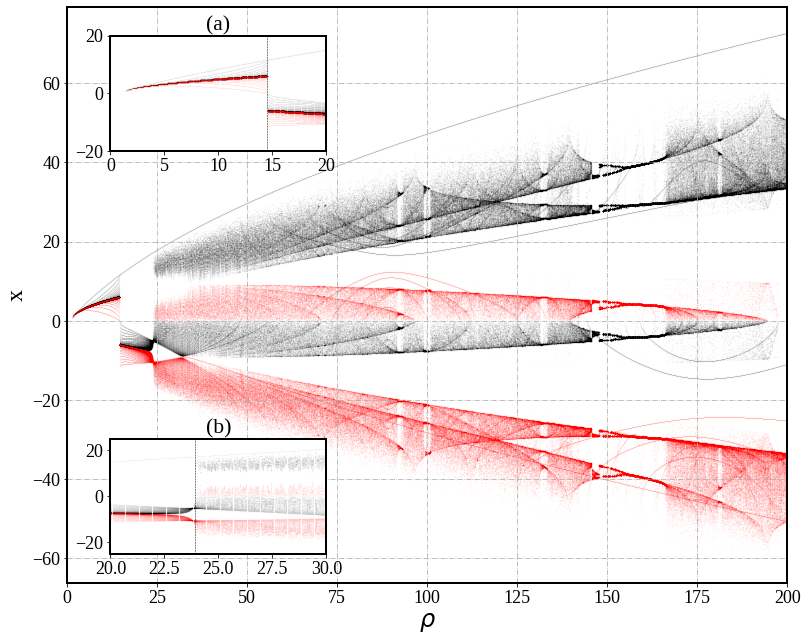

In [ ]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.06,0.75,0.3,0.2])
ax3 = fig.add_axes([0.06,0.05,0.3,0.2])

ax1.scatter(r_maxes, x_maxes, color="black", marker='.', s=.1, alpha=.1)
ax1.scatter(r_mins, x_mins, color="red", marker='.', s=.1, alpha=.1)
ax1.grid(linestyle='-.')
ax1.set_xlabel(r'$\rho$', size=24)
ax1.set_ylabel('x', size=24)
ax1.set_xlim(0,200)

ax2.scatter(r_maxes, x_maxes, color="black", marker='.', s=.1, alpha=.1)
ax2.scatter(r_mins, x_mins, color="red", marker='.', s=.1, alpha=.1)
ax2.set_xlim(0,20)
ax2.set_ylim(-20,20)
ax2.vlines(14.5, -20, 20, linestyles='dashed', linewidth=0.5)
ax2.set_title('(a)')

ax3.scatter(r_maxes, x_maxes, color="black", marker='.', s=.1, alpha=.1)
ax3.scatter(r_mins, x_mins, color="red", marker='.', s=.1, alpha=.1)
ax3.set_xlim(20,30)
ax3.set_ylim(-25,25)
ax3.vlines(23.9, -25, 25, linestyles='dashed', linewidth=0.5)
ax3.set_title('(b)')

#ax.set_ylim(-40,40)
plt.savefig(fname + 'bifurcacao_x.png', dpi=500, bbox_inches='tight')
plt.show()